In [1]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

In [2]:
# Conducting exploratory analysis on engine data
df = pd.read_csv("/Users/chiral/git_projects/Predicting_Failure_NASA_Turbofan_Jet_Engine/CMaps/train_FD001.txt", delimiter=' ')

In [3]:
df.head()

,1,1.1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190,Unnamed: 26,Unnamed: 27
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN


## Opening of data reveals that there is no data labels so I am naming them here

In [7]:
column_names = ["unit_number","cycle_number","operational_setting_1","operational_setting_2","operational_setting_3"]
print(len(df.columns))
n_cols = 

# The rest of the columns are sensor measurements, let's label the remaining by an index 
for k in range(1,len(df.columns)-len(column_names)+1):
    column_names.append("sensor_measurement_{}".format(k))

df.columns = column_names

28


In [5]:
df.head()

,unit_number,cycle_number,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN


In [5]:
unit_1_df = df[df["unit_number"]==1]

<Axes: xlabel='cycle_number'>

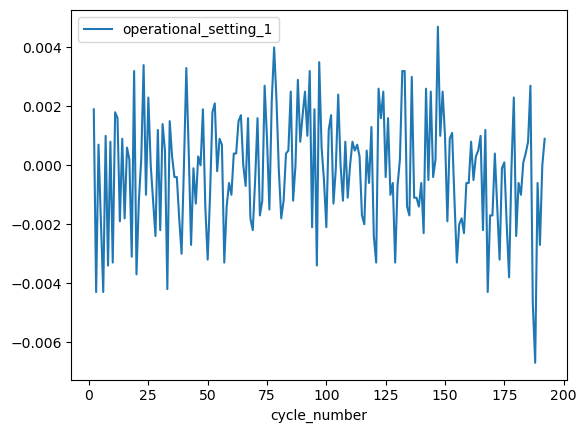

In [6]:
unit_1_df.plot(x="cycle_number",y="operational_setting_1")

In [7]:
z = unit_1_df["operational_setting_1"]

In [8]:
 # Create Kalman Filter instance
kf = KalmanFilter(dim_x=1, dim_z=1)

measurement_noise_std = 1

# Define the filter parameters
kf.x = np.array([[0.]])         # Initial state estimate
kf.F = np.array([[1.]])         # State transition matrix (A)
kf.H = np.array([[1.]])         # Measurement function (H)
kf.P *= 1000.                   # Initial uncertainty (high)
kf.R = measurement_noise_std**2 # Measurement noise (R)
kf.Q = 1e-5                     # Process noise (Q)

# Run the filter through the data
filtered = []

for measurement in z:
    kf.predict()
    kf.update(measurement)
    filtered.append(kf.x[0, 0])


In [11]:
def kalman_evaluation(measurements):
     # Create Kalman Filter instance
    kf = KalmanFilter(dim_x=1, dim_z=1)
    
    measurement_noise_std = 1
    
    # Define the filter parameters
    kf.x = np.array([[0.]])         # Initial state estimate
    kf.F = np.array([[1.]])         # State transition matrix (A)
    kf.H = np.array([[1.]])         # Measurement function (H)
    kf.P *= 1000.                   # Initial uncertainty (high)
    kf.R = measurement_noise_std**2 # Measurement noise (R)
    kf.Q = 1e-5   # Process noise (Q)
    predicted = []
    for value in measurements:
        kf.predict()
        kf.update(value)
        predicted.append(kf.x[0, 0])

    return predicted

In [12]:
kalman_evaluation([1,4,5,1])

[0.999000999010979, 2.4987581346606995, 3.3322415030232917, 2.7493064418332573]

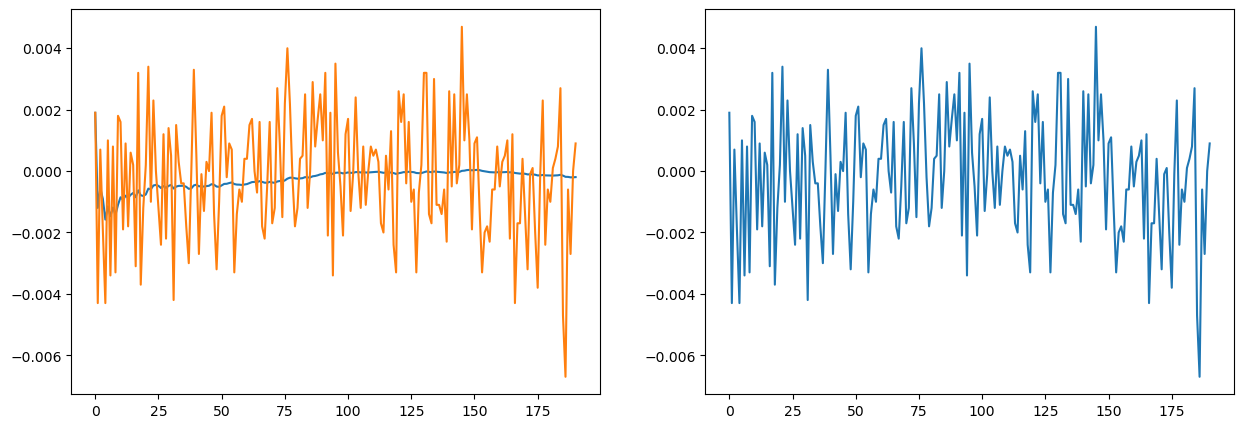

In [14]:
filtered = kalman_evaluation(unit_1_df["operational_setting_1"].values)
fig,axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(filtered)
axs[0].plot(z)
axs[1].plot(z)

In [15]:
for col in unit_1_df.columns:
    unit_1_df[col+"_smoothed"] = kalman_evaluation(unit_1_df[col].values)
    # print(arr)

/var/folders/qj/3zmdfhnn4bxgc68lbfycnlt40000gn/T/ipykernel_44217/1512459500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_1_df[col+"_smoothed"] = kalman_evaluation(unit_1_df[col].values)
/var/folders/qj/3zmdfhnn4bxgc68lbfycnlt40000gn/T/ipykernel_44217/1512459500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_1_df[col+"_smoothed"] = kalman_evaluation(unit_1_df[col].values)
/var/folders/qj/3zmdfhnn4bxgc68lbfycnlt40000gn/T/ipykernel_44217/1512459500.py:2: SettingWithCopyWarning: 
A value i

In [16]:
unit_1_df.head()

,unit_number,cycle_number,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14_smoothed,sensor_measurement_15_smoothed,sensor_measurement_16_smoothed,sensor_measurement_17_smoothed,sensor_measurement_18_smoothed,sensor_measurement_19_smoothed,sensor_measurement_20_smoothed,sensor_measurement_21_smoothed,sensor_measurement_22_smoothed,sensor_measurement_23_smoothed
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8123.366633,8.423377,0.029970,391.608392,2385.614386,99.900100,38.961039,23.400200,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8128.295877,8.420590,0.029985,390.804594,2386.806603,99.950025,38.955522,23.372214,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8130.140001,8.403132,0.029990,391.202936,2387.204276,99.966678,38.930356,23.372776,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8131.054804,8.409698,0.029993,391.652106,2387.403164,99.975007,38.922769,23.380680,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8131.413793,8.409918,0.029994,391.521703,2387.522515,99.980005,38.934213,23.377924,NaN,NaN


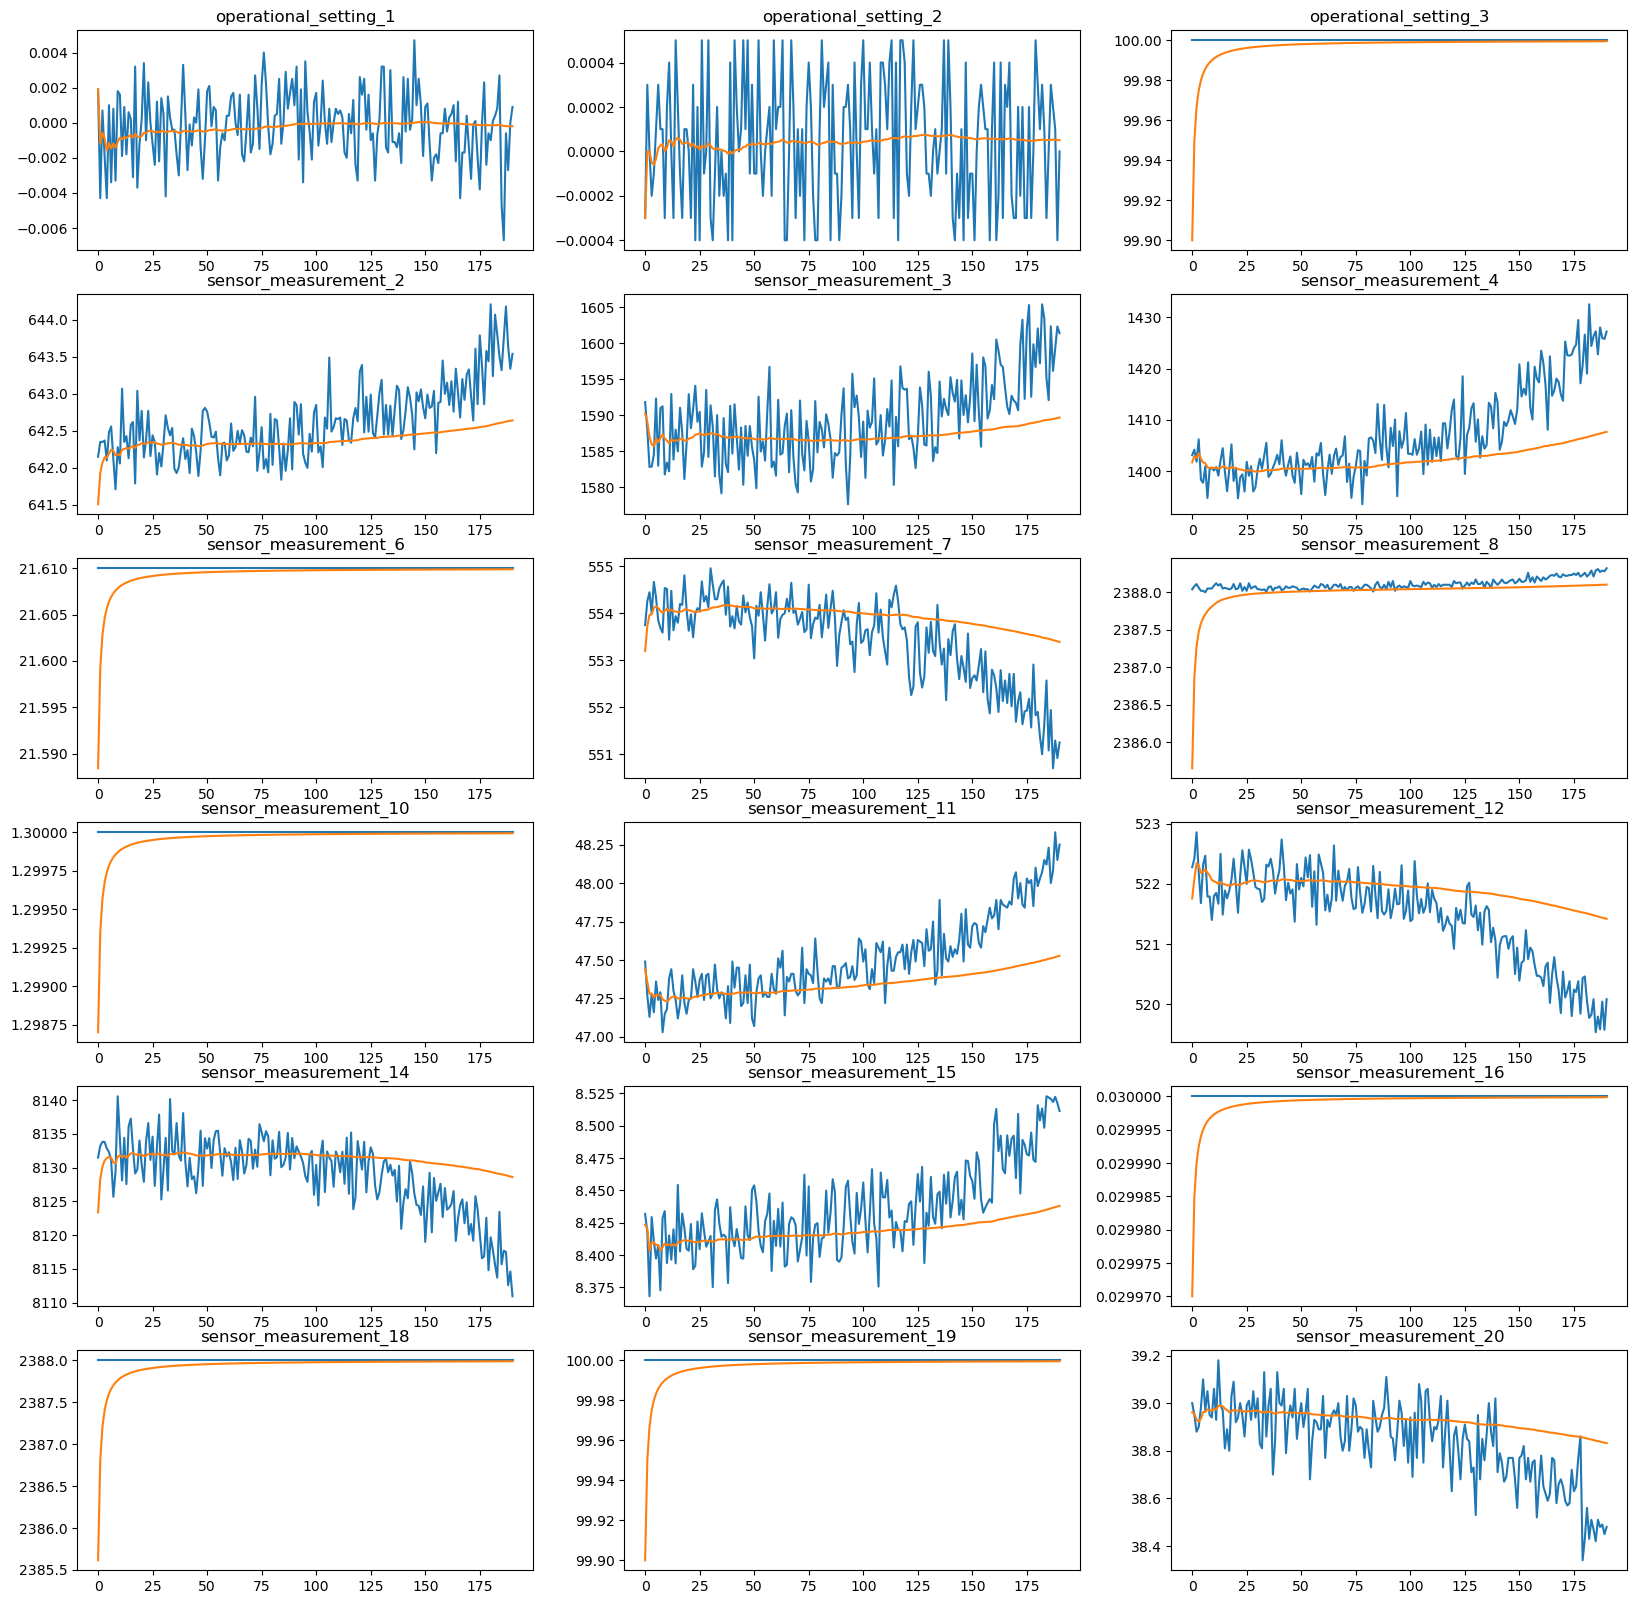

In [17]:
# Lets try and filter data for all of the sensors..
nrows, ncols  =  6,3
fig, axs = plt.subplots(nrows, ncols, figsize=(20,20))


counter=0
second_counter=0

columns = unit_1_df.columns

for i in range(nrows):
    counter+=1
    for j in range(ncols):
        counter+=1
        axs[i][j].plot(unit_1_df[columns[counter]])
        axs[i][j].plot(unit_1_df[columns[counter]+"_smoothed"])
        axs[i][j].set_title(columns[counter])

    